In [1]:
import pandas as pd 
import numpy as np 

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator
import plotly.graph_objects as go
import missingno as msno

import geopandas as gpd

#ML modules
from sklearn import datasets

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/Users/magnus/Desktop/programming/PROJECTS/London Real Estate Analysis/London.csv')
df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Property Name,Queens Road,Seward Street,Hotham Road,Festing Road,Spencer Walk
Price,1675000,650000,735000,1765000,675000
House Type,House,Flat / Apartment,Flat / Apartment,House,Flat / Apartment
Area in sq ft,2716,814,761,1986,700
No. of Bedrooms,5,2,2,4,2
No. of Bathrooms,5,2,2,4,2
No. of Receptions,5,2,2,4,2
Location,Wimbledon,Clerkenwell,Putney,Putney,Putney
City/County,London,London,London,London,London


In [3]:
#Some general info about the dataset and statiscal summary of each column
df.info()
df.describe().transpose()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3480.0,1.739500e+03,1.004734e+03,0.0,869.75,1739.5,2609.25,3479.0
Price,3480.0,1.864173e+06,2.267283e+06,180000.0,750000.00,1220000.0,2150000.00,39750000.0
Area in sq ft,3480.0,1.712974e+03,1.364259e+03,274.0,834.00,1310.0,2157.25,15405.0
No. of Bedrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Bathrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Receptions,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0


<Axes: >

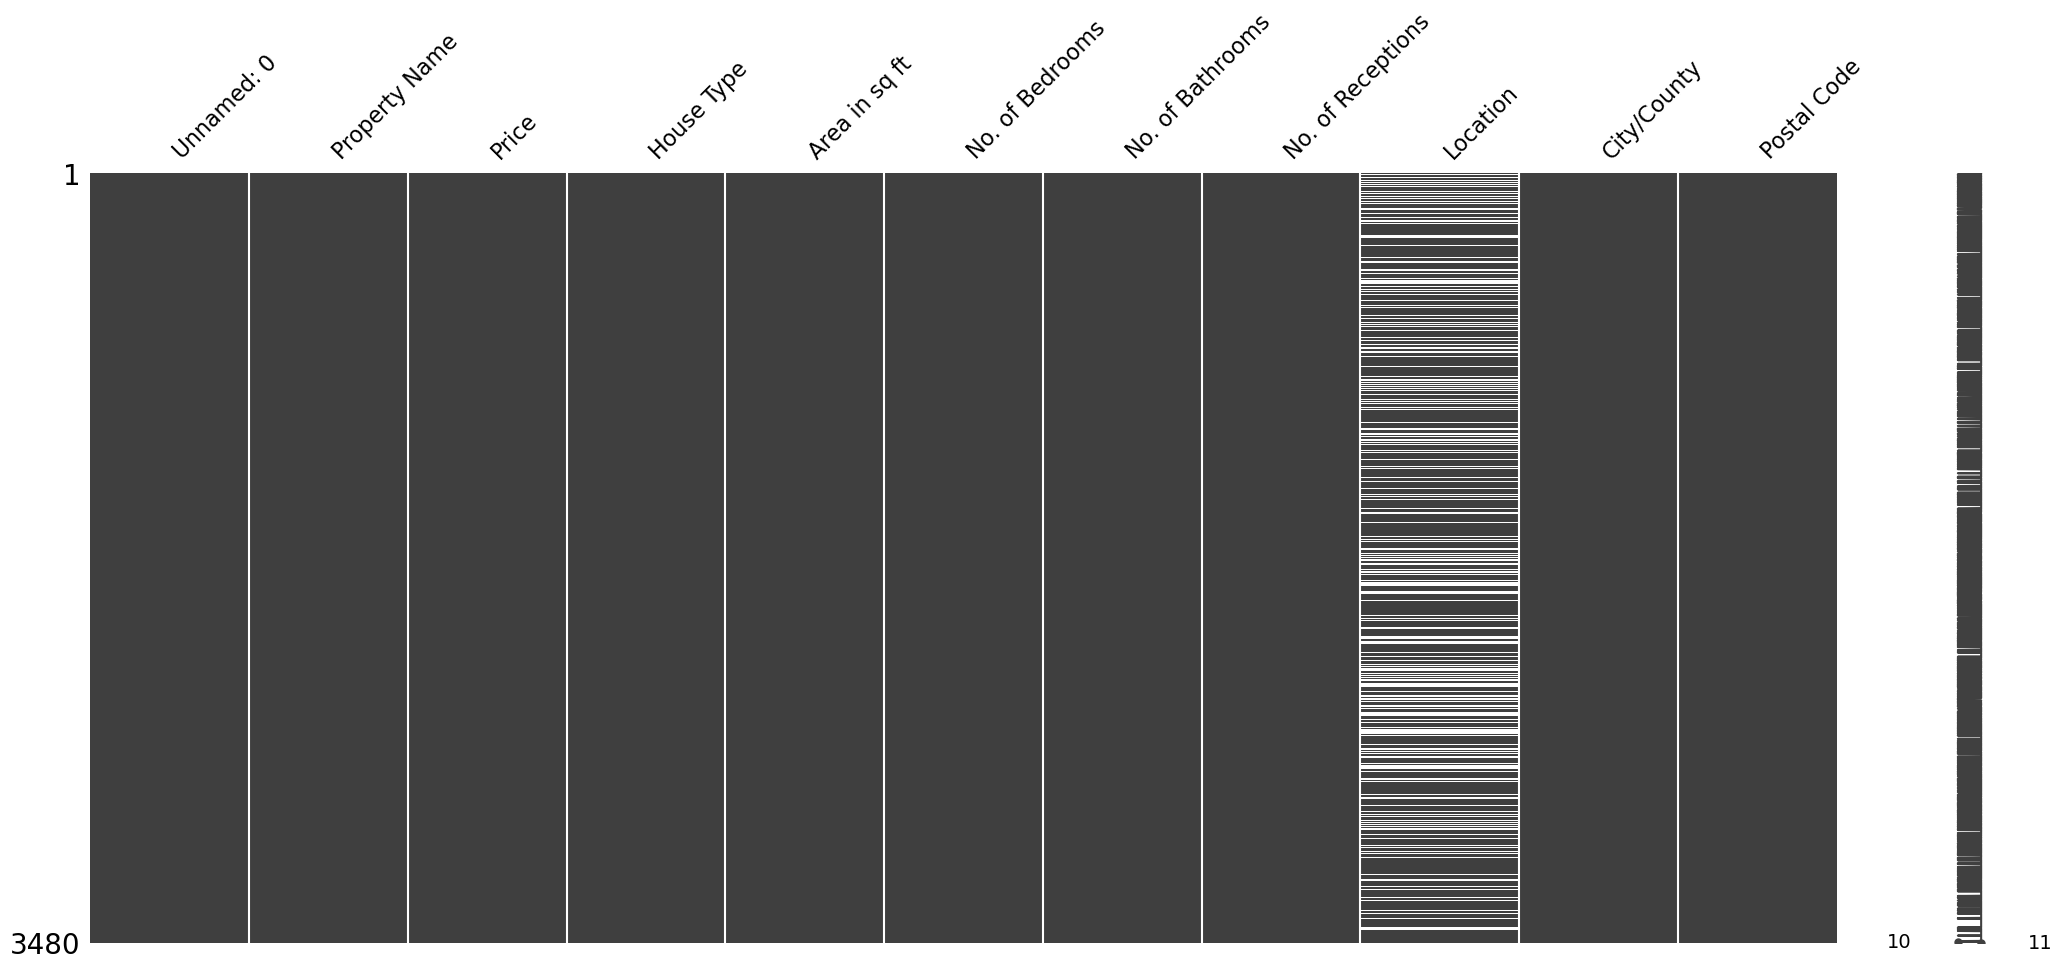

In [4]:
#Using a missing values library determine any missing or null values
msno.matrix(df)

In [5]:
unique_val = df['Postal Code'].nunique()
print(unique_val)
value_counts = df['Postal Code'].value_counts()
print(value_counts)

2845
Postal Code
SW6 3LF     14
SW6 1UE     12
SW15 2BS     9
SW11 4FA     8
SW11 2NU     8
            ..
SW13 9ET     1
W6 0HJ       1
SW18 2EJ     1
WD19 4NP     1
N6 4LP       1
Name: count, Length: 2845, dtype: int64


3 - Data Exploration

Plots of  price vs no of bedrooms and no of bathrooms




In [6]:
print(df['No. of Bathrooms'].value_counts())
print(df['No. of Bedrooms'].value_counts())

No. of Bathrooms
2     1078
3      706
4      576
5      453
1      414
6      176
7       53
0       10
8       10
9        3
10       1
Name: count, dtype: int64
No. of Bedrooms
2     1078
3      706
4      576
5      453
1      414
6      176
7       53
0       10
8       10
9        3
10       1
Name: count, dtype: int64


In [7]:
df['Price'].value_counts()

Price
1250000    59
650000     54
550000     54
850000     52
1100000    49
           ..
1065000     1
3395000     1
1180000     1
2399500     1
8650000     1
Name: count, Length: 536, dtype: int64

In [8]:
# Filter out values in 'Price' column above 15000000
df = df[df['Price'] <= 15000000]

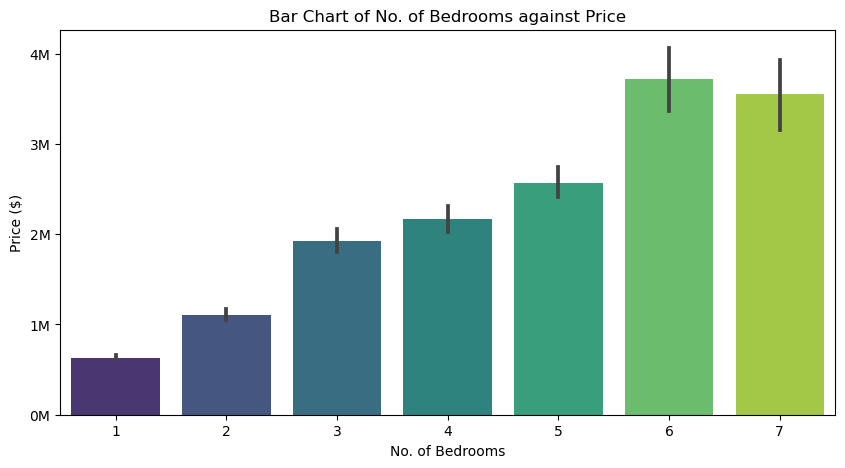

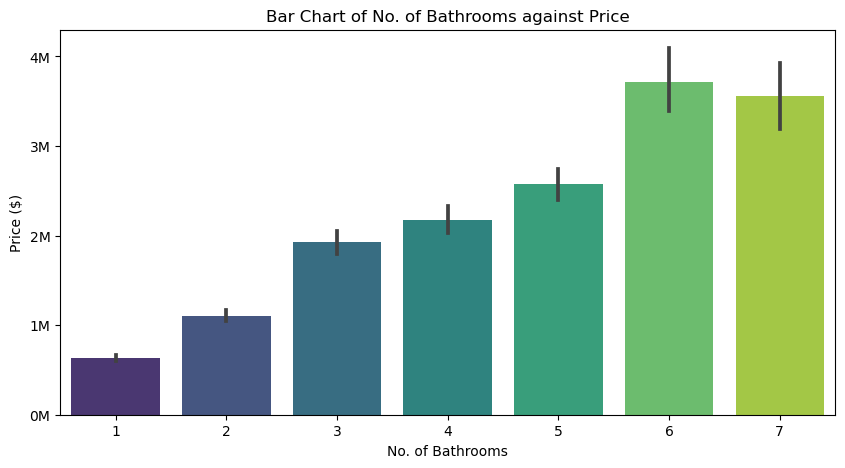

In [9]:
# Remove values of 0, 8, 9, and 10 in both columns
df = df[(df['No. of Bedrooms'] != 0) & (df['No. of Bedrooms'] <= 7)]
df = df[(df['No. of Bathrooms'] != 0) & (df['No. of Bathrooms'] <= 7)]

# Plot bar chart of No. of Bedrooms against Price
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x='No. of Bedrooms', y='Price', palette='viridis', ax=ax)
ax.set_title('Bar Chart of No. of Bedrooms against Price')
ax.set_xlabel('No. of Bedrooms')
ax.set_ylabel('Price ($)')
ax.grid(False)  # Remove grid lines
formatter = FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000))  # Format y-axis labels to display in millions
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.show()

# Plot bar chart of No. of Bathrooms against Price
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x='No. of Bathrooms', y='Price', palette='viridis', ax=ax)
ax.set_title('Bar Chart of No. of Bathrooms against Price')
ax.set_xlabel('No. of Bathrooms')
ax.set_ylabel('Price ($)')
ax.grid(False)  # Remove grid lines
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.show()

plots of price vs area in sq ft

In [10]:
df['Area in sq ft'].max()

12546

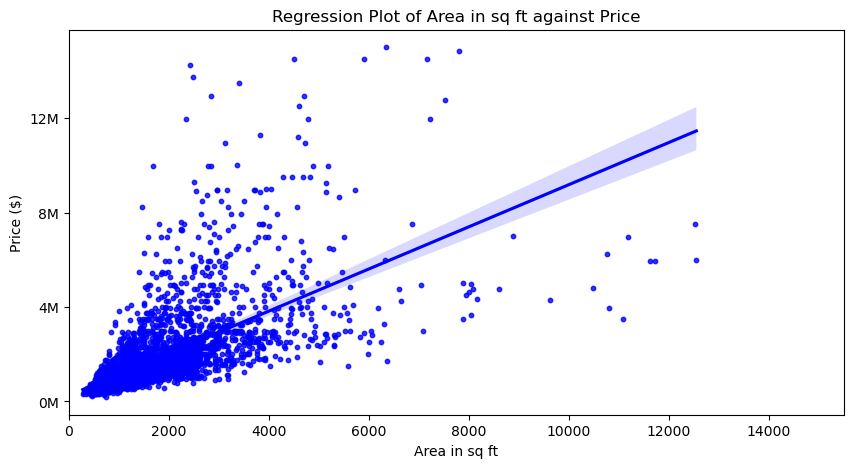

In [11]:
# Plot regression plot of 'Area in sq ft' against 'Price'
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Area in sq ft', y='Price', color='blue', marker='o', scatter_kws={'s': 10})  # Scatter_kws adjusts the size of the markers
plt.title('Regression Plot of Area in sq ft against Price')
plt.xlabel('Area in sq ft')
plt.ylabel('Price ($)')
plt.xlim(0, 15500)  # Set x-axis range

# Format y-axis labels to display in millions and avoid duplicate labels
formatter = FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.grid(False)
plt.show()

plots of proportion of House types and relationship between house types and price

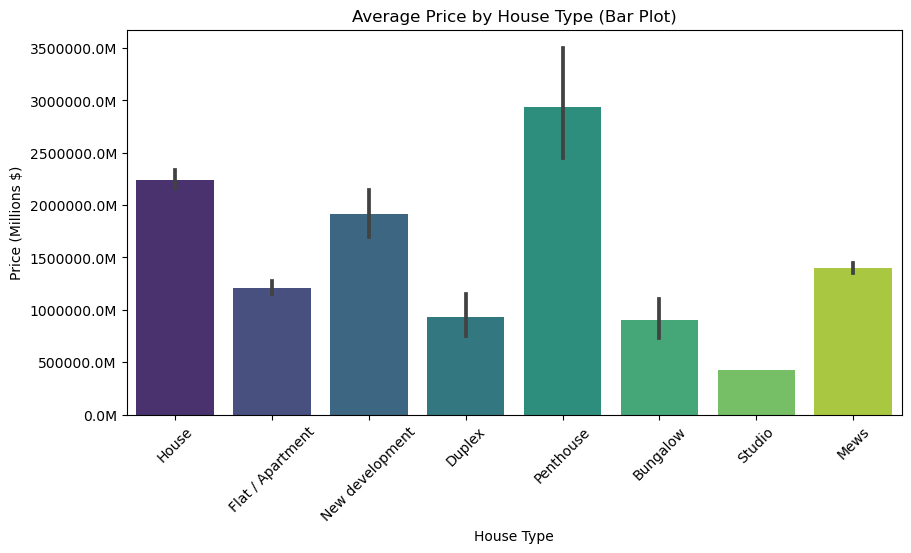

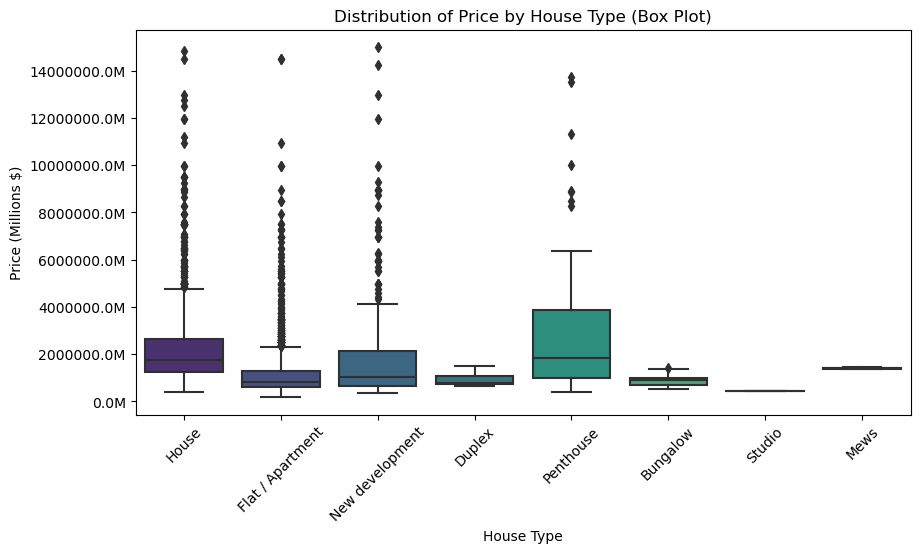

In [12]:
# Convert Price to millions
new_df = df.copy()  # Create a copy of the original DataFrame
#new_df['Price'] = df['Price'] / 1000000

# Define a function to format y-axis labels
def millions_formatter(x, pos):
    return '{:.1f}M'.format(x)

# Plotting using bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=new_df, x='House Type', y='Price', palette='viridis')
plt.title('Average Price by House Type (Bar Plot)')
plt.xlabel('House Type')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()

# Plotting using box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_df, x='House Type', y='Price', palette='viridis')
plt.title('Distribution of Price by House Type (Box Plot)')
plt.xlabel('House Type')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()


plots of location vs price, city/county vs price, postal code vs price

In [13]:
df['Location'].value_counts()

Location
Putney               96
Barnes               71
Wandsworth           70
Wimbledon            67
Esher                64
                     ..
Aberdeen Park         1
Southgate Road        1
 Dalston              1
162 Gideon Road       1
 Waterfront Drive     1
Name: count, Length: 652, dtype: int64

<Axes: >

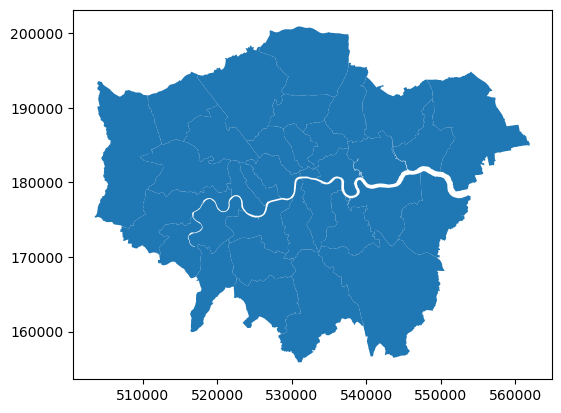

In [14]:
# Load geographical data (shapefile or GeoJSON)
# Replace 'path_to_shapefile' with the path to your shapefile or GeoJSON file
geo_data = gpd.read_file('//Users/magnus/Desktop/programming/PROJECTS/London Real Estate Analysis/London_Wards/Boroughs/London_Borough_Excluding_MHW.shp')
type(geo_data)
geo_data.plot()



In [15]:
import geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="postcodes")

In [16]:
geo_df = df[['Price', 'Postal Code']].copy()
geo_df

,Price,Postal Code
0,1675000,SW19 8NY
1,650000,EC1V 3PA
2,735000,SW15 1QL
3,1765000,SW15 1LP
4,675000,SW15 1PL
...,...,...
3475,3350000,SW6 1UE
3476,5275000,SW1A 1JT
3477,5995000,NW11 6TG
3478,6300000,W1S 3AR


In [19]:
# Define geolocator
geolocator = Nominatim(user_agent="my_geocoder")

def my_geocoder(row):
    try:
        location = geolocator.geocode(row)
        if location:
            return pd.Series({'Latitude': location.latitude, 'Longitude': location.longitude})
        else:
                print(f"Geocoding failed for {row}. Location not found.")
                return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})
    except Exception as e:
        print(f"Error geocoding {row}: {e}")
        return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})

# Apply my_geocoder function to 'Postal Code' column
geo_df[['Latitude', 'Longitude']] = geo_df['Postal Code'].apply(lambda x: my_geocoder(x))

# Drop rows where Latitude or Longitude is NaN
geo_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Create GeoDataFrame
geo_df = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.Longitude, geo_df.Latitude))
geo_df.crs = {'init': 'epsg:4326'}

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(geo_df["Latitude"])) / len(geo_df)) * 100))

geo_df.head()

Geocoding failed for N8 9JJ. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E14 9YT. Location not found.
Geocoding failed for NW7 1NY. Location not found.
Geocoding failed for EC2M 4JY. Location not found.
Geocoding failed for SE16 7UD. Location not found.
Geocoding failed for EC1V 2QQ. Location not found.
Geocoding failed for RM12 6RS. Location not found.
Geocoding failed for W1J 8JB. Location not found.
Geocoding failed for NW3 7ST. Location not found.
Geocoding failed for W1S 3AR. Location not found.
100.0% of addresses were geocoded!


/Users/magnus/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Price,Postal Code,Latitude,Longitude,geometry
0,1675000,SW19 8NY,51.42478,-0.18949,POINT (-0.18949 51.42478)
1,650000,EC1V 3PA,51.52640,-0.09785,POINT (-0.09785 51.52640)
2,735000,SW15 1QL,51.46507,-0.22364,POINT (-0.22364 51.46507)
3,1765000,SW15 1LP,51.46910,-0.22255,POINT (-0.22255 51.46910)
4,675000,SW15 1PL,51.46342,-0.22228,POINT (-0.22228 51.46342)


In [ ]:
def my_geocoder(row):
    try:
        point = geolocator.geocode(row).point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
    except:
        return None

geo_df[['Latitude', 'Longitude']] = geo_df.apply(lambda x: my_geocoder(x['Postal Code']), axis=1)
